# **Sign Language Real-Time Video Detection Project**

***************************************
**Team ID**: C241-PS342

**ML Team**:

  1. Fira Areta Apsarini (M004D4KX2469)
  2. Nadhira Apta Maheswari (M004D4KX1449)
  3. Keysa Anadea Aqiva Ajie (M004D4KX2378)

## **1. Dataset**

This project utilizes a combined dataset to develop a comprehensive model for recognizing BISINDO sign language alphabets. The dataset consist  of BISINDO sign language alphabet photos that comprises from two main sources: self-collected photos by each Machine Learning team member, and we integrated our self-collected data with a dataset from Kaggle, available at https://www.kaggle.com/datasets/achmadnoer/alfabet-bisindo <br>
Our public dataset can be accessed at https://drive.google.com/file/d/1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9/view?usp=drive_link

## **2. Data Loading**

### 2.1 Install Spesific Tensorflow Version

In [ ]:
# !pip install tensorflow==2.8.3

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


### 2.2 Import Libraries

In [ ]:
import keras
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
import os
import zipfile
import shutil
import gdown
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from sklearn.model_selection import train_test_split

### 2.3 Download Dataset

In [ ]:
# Mengunduh file menggunakan gdown
gdown.download('https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9', '/content/data.zip', quiet=False)

# Ekstrak file zip
local_zip = '/content/data.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('dataset')

Downloading...
From (original): https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9
From (redirected): https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9&confirm=t&uuid=e5ab0111-6e9e-4454-b417-c0769b79caab
To: /content/data.zip
100%|██████████| 3.23G/3.23G [00:29<00:00, 111MB/s] 


In [ ]:
# Path ke dataset yang diekstraksi
dataset_path = 'dataset'
organized_dataset_path = 'organized_dataset'

# Membuat direktori baru untuk dataset yang diatur ulang
os.makedirs(organized_dataset_path, exist_ok=True)

# Mengidentifikasi dan memindahkan gambar ke subfolder berdasarkan huruf pertama
for file_name in os.listdir(dataset_path):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        label = file_name[0]  # Mengambil karakter pertama dari nama file
        label_folder = os.path.join(organized_dataset_path, label)
        os.makedirs(label_folder, exist_ok=True)
        shutil.move(os.path.join(dataset_path, file_name), os.path.join(label_folder, file_name))

In [ ]:
# Direktori untuk training dan validation
train_path = 'dataset/train'
val_path = 'dataset/validation'

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Membuat subfolder untuk setiap alfabet di dalam training dan validation
for label in os.listdir(organized_dataset_path):
    os.makedirs(os.path.join(train_path, label), exist_ok=True)
    os.makedirs(os.path.join(val_path, label), exist_ok=True)

    # Mendapatkan semua file dalam subfolder
    file_names = os.listdir(os.path.join(organized_dataset_path, label))

    # Membagi file menjadi training dan validation sets
    train_files, val_files = train_test_split(file_names, test_size=0.2, random_state=42)

    # Memindahkan file ke masing-masing folder
    for file_name in train_files:
        shutil.move(os.path.join(organized_dataset_path, label, file_name), os.path.join(train_path, label, file_name))
    for file_name in val_files:
        shutil.move(os.path.join(organized_dataset_path, label, file_name), os.path.join(val_path, label, file_name))

In [ ]:
# Define the directory path
directory ='/content/dataset/validation/A'

# Check if the directory exists
if os.path.exists(directory):
    # Count the number of files in the directory
    num_files = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
    print(f"Number of files: {num_files}")
else:
    print("Directory not found")

Number of files: 30


## **3. Data Pre-processing**

In [ ]:

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


validation_split =0.2 #0.3
#import for training dataset
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

#import for validation dataset
validation_set = validation_datagen.flow_from_directory('dataset/validation',
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')


STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
#STEP_SIZE_TEST=test_set.n//test_set.batch_size
validation_set.class_indices
#indices the label

Found 3108 images belonging to 26 classes.
Found 777 images belonging to 26 classes.


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

## **4. Modelling Using MobileNet**

In [ ]:
IMAGE_SIZE = [224, 224] #size of images
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #initiation of import MobileNet

#ADDING FOR CUSTOM LAYERS
for layer in mobilenet.layers:
    layer.trainable = False

x = Flatten()(mobilenet.output)

prediction = Dense(26, activation='softmax')(x) #initiation for number of maximal output dense
model = Model(inputs=mobilenet.input, outputs=prediction)

model.compile(loss='categorical_crossentropy', #categorical_crosentropy is for multilabel (over than 2 classes)
                    optimizer=tf.optimizers.Adam(0.001), #learning rate (estimation/iteration)
                    metrics=['accuracy'])
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                              

## **5. Re-Training**

In [ ]:
model_fit = model.fit(training_set, epochs = 50, #itteration for training
                     validation_data = validation_set)

Epoch 1/50
3108/3108 [==============================] - 117s 36ms/step - loss: 32.1019 - accuracy: 0.5042 - val_loss: 20.5939 - val_accuracy: 0.7169
Epoch 2/50
3108/3108 [==============================] - 107s 34ms/step - loss: 8.4516 - accuracy: 0.8710 - val_loss: 19.5319 - val_accuracy: 0.7568
Epoch 3/50
3108/3108 [==============================] - 108s 35ms/step - loss: 6.3941 - accuracy: 0.9048 - val_loss: 19.9851 - val_accuracy: 0.7671
Epoch 4/50
3108/3108 [==============================] - 115s 37ms/step - loss: 5.3305 - accuracy: 0.9353 - val_loss: 25.2187 - val_accuracy: 0.7593
Epoch 5/50
3108/3108 [==============================] - 108s 35ms/step - loss: 2.5190 - accuracy: 0.9604 - val_loss: 29.4820 - val_accuracy: 0.7645
Epoch 6/50
3108/3108 [==============================] - 109s 35ms/step - loss: 2.5246 - accuracy: 0.9675 - val_loss: 22.2477 - val_accuracy: 0.7992
Epoch 7/50
3108/3108 [==============================] - 107s 34ms/step - loss: 2.7032 - accuracy: 0.9633 - val_

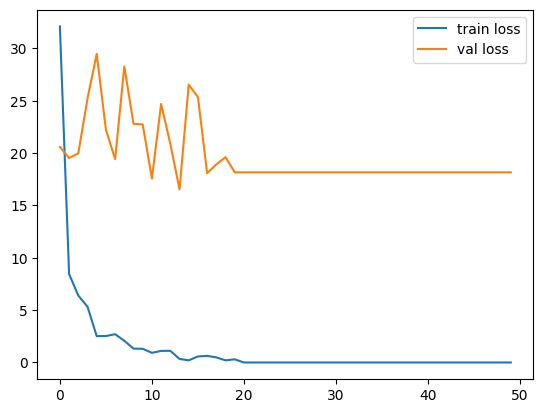

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(model_fit.history['loss'], '',label='train loss')
plt.plot(model_fit.history['val_loss'], '' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

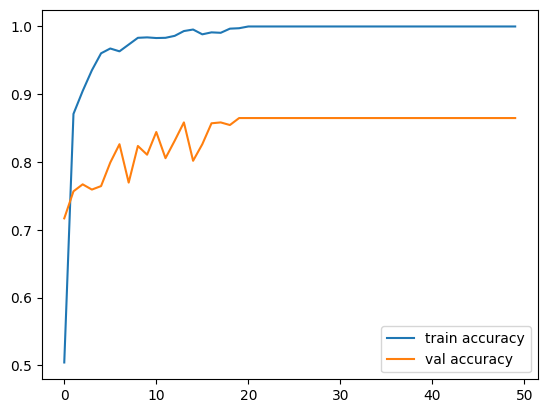

<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(model_fit.history['accuracy'], '',label='train accuracy')
plt.plot(model_fit.history['val_accuracy'], '',label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('modelMobileNet.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modelMobileNet.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
uploaded = files.upload()
labels = training_set.class_indices.keys()

for paths in uploaded.keys():
    path = paths
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.mobilenet.preprocess_input(x)

    images = np.vstack([x])
    proba = model.predict(images)[0]

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    for (label, p) in zip(labels, proba):
        print("{}: {:.2f}%".format(label, p * 100))

import os
os.remove(path)

NameError: name 'files' is not defined